<a href="https://colab.research.google.com/github/vishnucontrol/ss_churn_prediction/blob/main/ss_prepro_visual_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import pandas as pd

# Load dataset (assuming a CSV file)
df = pd.read_csv('/content/drive/MyDrive/NOTES/churn_data/E Commerce Dataset.csv')


In [80]:
# Basic info of the dataset
print(df.info())

# Show sample records
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerid                   5630 non-null   int64  
 1   churn                        5630 non-null   int64  
 2   tenure                       5366 non-null   float64
 3   preferredlogindevice         5630 non-null   object 
 4   citytier                     5630 non-null   int64  
 5   warehousetohome              5379 non-null   float64
 6   preferredpaymentmode         5630 non-null   object 
 7   gender                       5630 non-null   object 
 8   hourspendonapp               5375 non-null   float64
 9   numberofdeviceregistered     5630 non-null   int64  
 10  preferedordercat             5630 non-null   object 
 11  satisfactionscore            5630 non-null   int64  
 12  maritalstatus                5630 non-null   object 
 13  numberofaddress        

In [81]:
# Assuming df is your DataFrame
threshold = 0.05  # 5%

# Iterate through each column to check null values
for column in df.columns:
    # Calculate the percentage of null values for the column
    null_percentage = df[column].isnull().mean()

    # If null percentage is less than 5%, drop those rows
    if null_percentage < threshold:
        df.dropna(subset=[column], inplace=True)


In [83]:
# Convert categorical variables using one-hot encoding
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:

  df = pd.get_dummies(df, columns=categorical_columns)

# Or use label encoding for ordinal features
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  df['satisfactionscore'] = le.fit_transform(df['satisfactionscore'])


In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load your data
# df = pd.read_csv('your_data.csv')  # Uncomment and specify your dataset path

# Specify the churn column
churn_col = 'churn'  # Replace with your actual churn column name

# Option 1: Standardize the data
scaler = StandardScaler()

# Select numeric columns excluding the churn column
numeric_columns = df.select_dtypes(include=['number']).columns.difference([churn_col])

if len(numeric_columns) > 0:
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Option 2: Min-Max Scale the data
min_max_scaler = MinMaxScaler()

# Again, select numeric columns excluding the churn column
if len(numeric_columns) > 0:
    df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])


In [85]:
df.columns

Index(['customerid', 'churn', 'tenure', 'citytier', 'warehousetohome',
       'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore',
       'numberofaddress', 'complain', 'orderamounthikefromlastyear',
       'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount',
       'preferredlogindevice_Computer', 'preferredlogindevice_Mobile Phone',
       'preferredlogindevice_Phone', 'preferredpaymentmode_CC',
       'preferredpaymentmode_COD', 'preferredpaymentmode_Cash on Delivery',
       'preferredpaymentmode_Credit Card', 'preferredpaymentmode_Debit Card',
       'preferredpaymentmode_E wallet', 'preferredpaymentmode_UPI',
       'gender_Female', 'gender_Male', 'preferedordercat_Fashion',
       'preferedordercat_Grocery', 'preferedordercat_Laptop & Accessory',
       'preferedordercat_Mobile', 'preferedordercat_Mobile Phone',
       'preferedordercat_Others', 'maritalstatus_Divorced',
       'maritalstatus_Married', 'maritalstatus_Single'],
      dtype='object')

In [86]:
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('vectorizer', TfidfVectorizer()),
    # Add more steps as needed
])


In [88]:
print(X_train.shape)
print(X_test.shape)


(3888, 35)
(972, 35)


In [89]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


orderamounthikefromlastyear    265
couponused                     256
ordercount                     258
daysincelastorder              307
dtype: int64


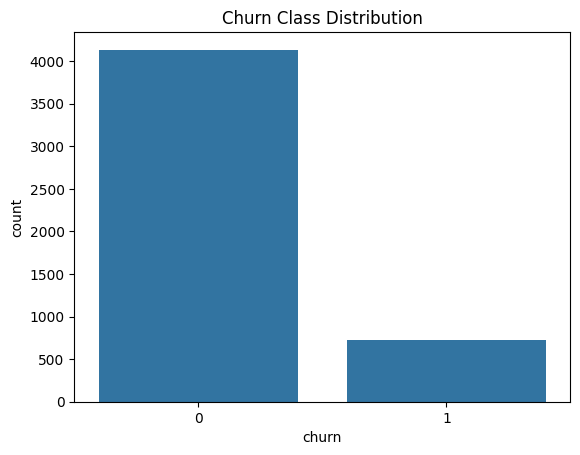

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='churn', data=df)
plt.title('Churn Class Distribution')
plt.show()


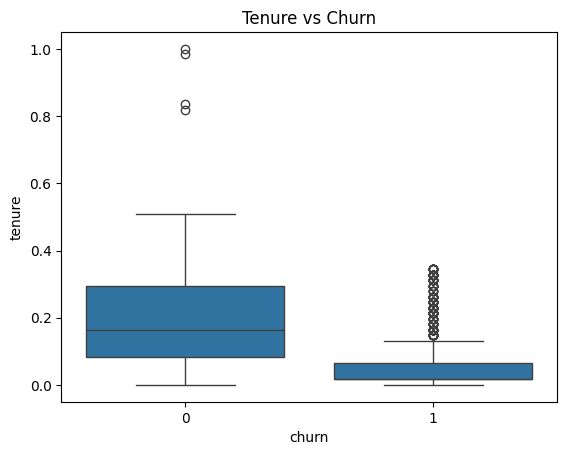

In [91]:
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


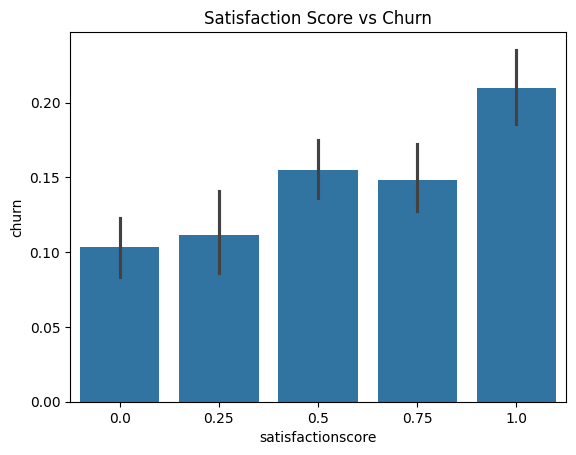

In [92]:
sns.barplot(x='satisfactionscore', y='churn', data=df)
plt.title('Satisfaction Score vs Churn')
plt.show()


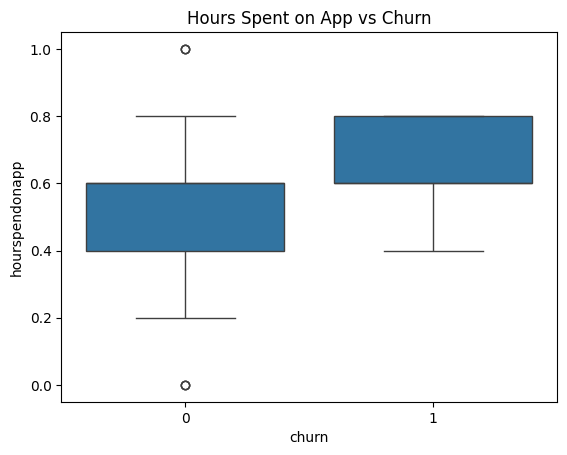

In [93]:
sns.boxplot(x='churn', y='hourspendonapp', data=df)
plt.title('Hours Spent on App vs Churn')
plt.show()


In [94]:
import numpy as np

# Correlation matrix for numerical features
corr_matrix = df[['tenure', 'orderamounthikefromlastyear', 'hourspendonapp', 'numberofdeviceregistered', 'ordercount', 'cashbackamount', 'churn']].corr()

# Select features with absolute correlation greater than 0.05
threshold = 0.05
correlation_with_churn = corr_matrix['churn'].abs()
selected_columns = correlation_with_churn[correlation_with_churn > threshold].index.tolist()

print("Selected columns:", selected_columns)
selected_columns.remove('churn')
print("Selected columns without 'churn':", selected_columns)

Selected columns: ['tenure', 'hourspendonapp', 'numberofdeviceregistered', 'cashbackamount', 'churn']
Selected columns without 'churn': ['tenure', 'hourspendonapp', 'numberofdeviceregistered', 'cashbackamount']


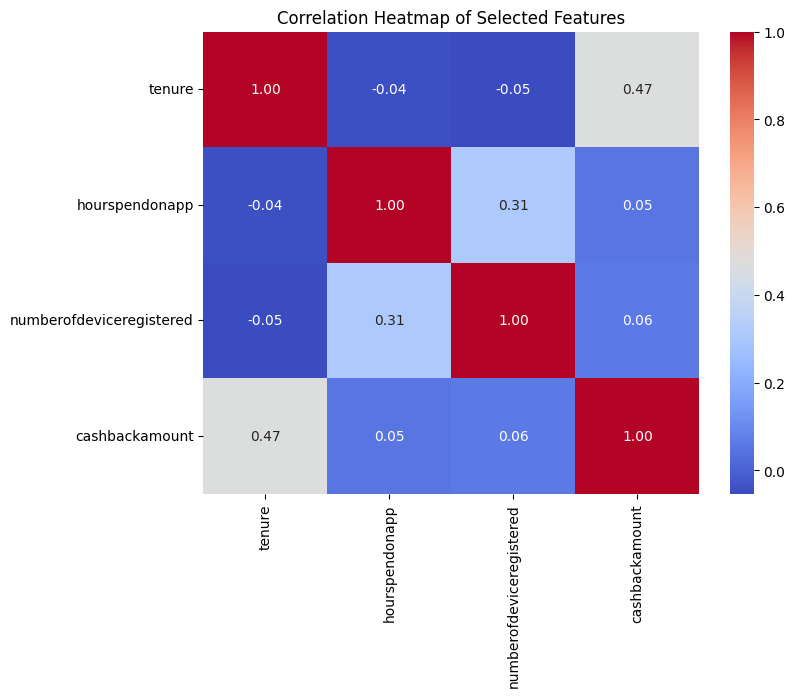

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for selected columns
selected_columns1 = df[selected_columns]

# Generate the correlation matrix for selected columns
corr_matrix_filtered = selected_columns1.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [97]:
X=df[selected_columns]
y=df['churn']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
y[0]

1

In [100]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:00:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [101]:
# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)


In [102]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

print("Logistic Regression Evaluation:")
evaluate_model(y_test, y_pred_log_reg)

print("\nRandom Forest Evaluation:")
evaluate_model(y_test, y_pred_rf)

print("\nXGBoost Evaluation:")
evaluate_model(y_test, y_pred_xgb)


Logistic Regression Evaluation:
Accuracy: 0.8539
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5000
Confusion Matrix:
 [[830   0]
 [142   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       830
           1       0.00      0.00      0.00       142

    accuracy                           0.85       972
   macro avg       0.43      0.50      0.46       972
weighted avg       0.73      0.85      0.79       972


Random Forest Evaluation:
Accuracy: 0.9527
Precision: 0.8692
Recall: 0.7958
F1 Score: 0.8309
ROC AUC: 0.8876
Confusion Matrix:
 [[813  17]
 [ 29 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       830
           1       0.87      0.80      0.83       142

    accuracy                           0.95       972
   macro avg       0.92      0.89      0.90       972
weighted avg       0.95      0.95      0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [103]:
import joblib

# Save models
joblib.dump(log_reg, 'logistic_regression_model.joblib')
joblib.dump(rf_classifier, 'random_forest_model.joblib')
joblib.dump(xgb_classifier, 'xgboost_model.joblib')


['xgboost_model.joblib']